<a href="https://colab.research.google.com/github/Kynikoi1/Math-273-Spring-2024/blob/main/DSE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ECE 131A Data science exploration 1:
Please complete this jupyter notebook by filling out the code blocks. Once you have completed the notebook, generate a PDF of the completed notebook and upload the PDF to Gradescope by 11:59 PM on 10/25/2024.


#### DSE Overview
In this data science exploration, we will be visiting the 'Birthday Problem'. The problem computes the probability of having at least one birthday coincidence in a random group of people. We derived an exact analytical solution to this problem in Lecture 5, but in this part we will estimate the probability empirically with the help of a computer simulation. Empirically estimating probabilities of outcomes involves repeating the process that leads to the outcomes a large number of times. Then using the law of large numbers, we estimate the probability of an outcome as:
$ \begin{align}
P(outcome) \sim \frac{\# outcome}{\# trials}
\end{align}$

Approximating the birthday coincidence probability with this approach basically involves taking random k-people samples from the population and counting how many of them have at least one birthday coincidence. Then you simply divide this number by the total number of samples and this is (approximately) the probability of the “At Least One Coincidence” (ALOC) outcome.But since actually obtaining random samples of birthdays is quite difficult and time-consuming, we want to simulate this process on a computer with the simplifying assumptions from the original birthday problem. Namely:


- The birthdays are independent of each other
- Each possible birthday has the same probability
- There are only 365 possible birthdays

In a nutshell, here is what our simulation should do:

1. Generate a list of k random numbers between 1 and 365 (representing the 365 possible birthdays of the k people)

2. Check if the list contains any coincidences or all k numbers are different

3. Repeat steps 1 and 2 N number of times and keep track of the number of lists with at least one coincidence (C)

4. Estimate $P(ALOC) = \frac{C}{N}$

In [2]:
## Importing the necessary packages
from random import randint

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math, Latex

#### Step 1: Generating a list of k random numbers between 1 and 365

In [3]:
## Write a function that takes in the parameter k and returns a list of k random numbers between 1 and 365
## Helpful functions: randint

def generate_birthdays(k):

   # Start your code here
   birthday_list = []
   i = 0
   while i < k:
     birthday_list.append(randint(1,365))
     i += 1
   return birthday_list
   pass

    # End your code here


#### Step 2: Check if the list contains any coincidences or all k numbers are different

In [4]:
## Write a function that takes in the list of birthdays and returns a True if the list has any coincidence or False if
## all the birthdays in the list are distinct
## Helpful functions: set,len

def coincidence(birthday_list):

    # Start your code here
    if (len(set(birthday_list)) != len(birthday_list)):
      return True
    if (len(set(birthday_list)) == len(birthday_list)):
      return False
    pass

    # End your code here

#### Step 3: Repeat step 1 and step 2 N number of times and keep track of the number of lists with at least one coincidence (C)

In [5]:
## Write a function that takes in the parameter number of trials N, number of people k,
## and runs steps 1 and 2 N number of times and returns the number of times there is at least one coincidence (C)

def num_coincidence(N,k):
    num_of_coincidence = 0
    # Start your code here
    i = 0
    while i < N:
      if (coincidence(generate_birthdays(k)) == True):
        num_of_coincidence += 1
        i += 1
      else:
        i += 1
    return num_of_coincidence
    pass

    # End your code here


#### Step 4: Estimate the probability of having at least one coincidence

In [6]:
## Write a function that takes in the parameter number of people k, number of trials N and returns the
## probability estimate of having at least one coincidence

def estimate_p_aloc(N,k):

    # Start your code here
    return (num_coincidence(N, k))/N
    pass


    # End your code here

Estimate the probability of having at least one coincidence in a group of 23 people by running simulation for [500,1000,5000,10000,20000] trials. For a given number of trial, you should repeat the simulation 100 times to get 100 probability estimates and record the mean and variance of these 100 probability estimates. Plot the mean of the probability estimates as a function of the number of trials with the variance of the probability estimates displayed as an error bar in the plot.

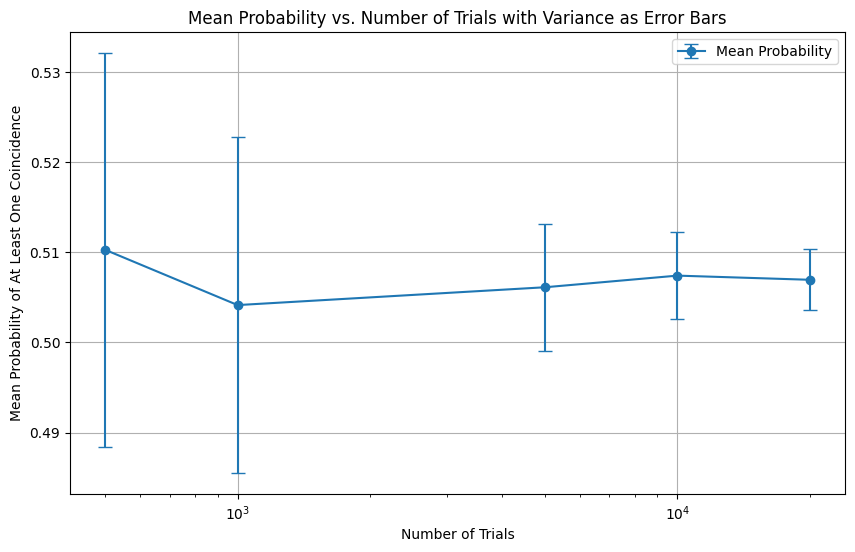

In [37]:
## Helpful functions: np.mean,np.var,plt.plot,plt.errorbar
num_estimates = 100
num_people = 23
i = 0
j = 0
probabilities = [[],[],[],[],[]]

## Start your code here
trials_list = [500,1000,5000,10000,20000]
while i < len(trials_list):
  j = 0
  while j < num_estimates:
    probabilities[i].append(estimate_p_aloc(trials_list[i],num_people))
    j += 1
  i += 1

array = [np.array(sublist) for sublist in probabilities]

import numpy as np

# Assuming `array` is a list of arrays with data corresponding to `trials_list`
array_500, array_1000, array_5000, array_10000, array_20000 = array  # Ensure `array` is defined correctly

mean_list = []
var_list = []
k = 0
trials_list = [500, 1000, 5000, 10000, 20000]

# Calculate mean and variance
while k < len(trials_list):
    mean_list.append(np.mean(array[k]))  # Collect mean in a Python list
    var_list.append(np.var(array[k]))    # Collect variance in a Python list
    k += 1

# Convert to NumPy arrays if needed
mean = np.array(mean_list)
var = np.array(var_list)

# Standard deviation as error bars (square root of variance)
error_bars = np.sqrt(var)

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(trials_list, mean, yerr=error_bars, fmt='o-', capsize=5, label='Mean Probability')
plt.xscale('log')  # Logarithmic scale for better readability
plt.xlabel('Number of Trials')
plt.ylabel('Mean Probability of At Least One Coincidence')
plt.title('Mean Probability vs. Number of Trials with Variance as Error Bars')
plt.legend()
plt.grid(True)
plt.show()
## End your code here


Generate a plot of P(having at least one coincidence) as a function of the number of people: Sweep the number of people from 2 to 60 in increments of 1 and for a given number of people repeat the simulation 10 times (each simulation with 10,000 trials) to get 10 probability estimates of having at least one coincidence and record the mean and variance of these 10 probability estimates. Plot the mean of the probability estimates as a function of the number of people with the variance of the probability estimates displayed as an error bar in the plot.


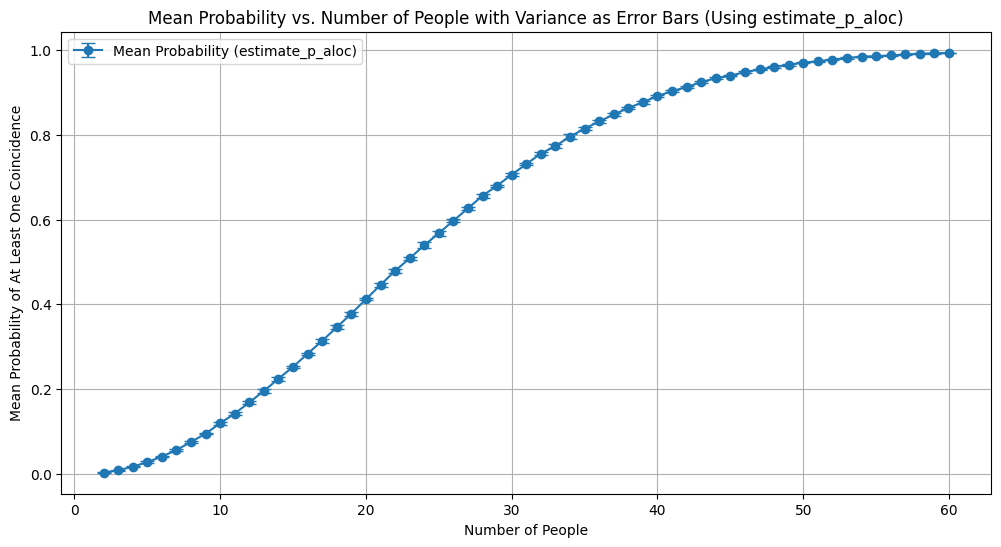

In [36]:
## Helpful functions: np.mean,np.var,plt.plot,plt.errorbar

## Start your code here

# Sweep over number of people in the group
num_people_range = range(2, 61) # Range of people from 2 to 60
num_trials = 10000  # Number of trials per simulation
num_simulations = 10  # Repeat each simulation 10 times

p_aloc_mean_probabilities = []
p_aloc_variance_probabilities = []

for num_people in num_people_range:
    probabilities = []  # Store probability estimates for each simulation

    # Repeat simulation 10 times using estimate_p_aloc
    for _ in range(num_simulations):
        probability = estimate_p_aloc(num_trials, num_people)
        probabilities.append(probability)

    # Calculate mean and variance of the probability estimates
    mean_prob = np.mean(probabilities)
    var_prob = np.var(probabilities)
    p_aloc_mean_probabilities.append(mean_prob)
    p_aloc_variance_probabilities.append(var_prob)

# Plotting results using estimate_p_aloc
plt.figure(figsize=(12, 6))
plt.errorbar(num_people_range, p_aloc_mean_probabilities,
             yerr=np.sqrt(p_aloc_variance_probabilities), fmt='o-', capsize=5, label='Mean Probability (estimate_p_aloc)')
plt.xlabel('Number of People')
plt.ylabel('Mean Probability of At Least One Coincidence')
plt.title('Mean Probability vs. Number of People with Variance as Error Bars (Using estimate_p_aloc)')
plt.grid(True)
plt.legend()
plt.show()

## End your code here


In [35]:
print(probabilities)

[0.9944, 0.993, 0.9934, 0.994, 0.9939, 0.9931, 0.993, 0.9939, 0.9941, 0.9952]
